# Importation library

In [3283]:
#importation
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from numpy.linalg import eig

In [3284]:
#import mes données
df=pd.read_csv('../data/NY-House-Dataset.csv')

In [3285]:
#Connaitre les dimensions de notre jeu de données
df.shape

(4801, 17)

In [3286]:
#Prévisualiser mes données
display(df)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [3287]:
#Obtenir des informations sur les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [3288]:
# Détecter les doublons
doublons = df[df.duplicated()]
doublons

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
81,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
115,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
116,Brokered by Sowae Corp,Multi-family home for sale,346000,5,2.000000,2184.207862,103-12 104th St,"Ozone Park, NY 11417","103-12 104th StOzone Park, NY 11417",United States,New York,Queens County,Queens,104th Street,"103-12 104th St, Jamaica, NY 11417, USA",40.683789,-73.838104
149,Brokered by CENTURY 21 PROFESSIONAL REALTY,House for sale,659000,8,3.000000,2184.207862,148-05 111th Ave,"Jamaica, NY 11435","148-05 111th AveJamaica, NY 11435",United States,New York,Queens County,Queens,111th Avenue,"148-05 111th Ave, Jamaica, NY 11435, USA",40.688533,-73.796529
214,Brokered by COMPASS,Co-op for sale,695000,2,2.000000,2184.207862,575 Park Ave Unit 1101,"Manhattan, NY 10065","575 Park Ave Unit 1101Manhattan, NY 10065",New York,New York County,New York,Manhattan,575,"575 Park Ave # 1101, New York, NY 10065, USA",40.765172,-73.967872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4752,Brokered by COMPASS,Co-op for sale,795000,3,1.000000,2184.207862,720 Greenwich St Apt 9G,"Manhattan, NY 10014","720 Greenwich St Apt 9GManhattan, NY 10014",New York,New York County,New York,Manhattan,720,"720 Greenwich St #9g, New York, NY 10014, USA",40.734599,-74.007273
4753,Brokered by Keller Williams NYC,Co-op for sale,872500,1,1.000000,2184.207862,32 Gramercy Park S Apt 8B,"New York, NY 10003","32 Gramercy Park S Apt 8BNew York, NY 10003",New York,New York County,New York,Manhattan,32,"32 Gramercy Pk S #8b, New York, NY 10003, USA",40.736983,-73.984881
4775,Brokered by EXIT REALTY PREMIER,House for sale,749000,3,2.373861,2002.000000,631 Essex St,"Brooklyn, NY 11208","631 Essex StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Essex Street,"631 Essex St, Brooklyn, NY 11208, USA",40.668173,-73.880027
4780,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714


In [3289]:
# Determinations de nombre de doublons dans notre DataFrame
nombre_de_doublons = len(doublons)
nombre_de_doublons

214

In [3290]:
#Supprimer les 214 lignes doublons
df.drop_duplicates(inplace=True)
#reinitialiser les index 
df.reset_index(drop=True, inplace=True)

In [3291]:
#Convertir BATH
df['BATH']=df['BATH'].astype(np.int64)

In [3292]:
#verifier la taille de ma dataframe
df.shape

(4587, 17)

In [3293]:
# Nombre total de valeurs manquantes (Null) dans l'ensemble de la DataFrame:
nbr_val_null = df.isna().sum().sum()
print("Le nombre total de valeurs manquantes est :", nbr_val_null)

Le nombre total de valeurs manquantes est : 0


In [3294]:
#Data selection 
df=df [[ 'BROKERTITLE','BEDS', 'BATH','PRICE', 'PROPERTYSQFT','TYPE',"LOCALITY","SUBLOCALITY"]]

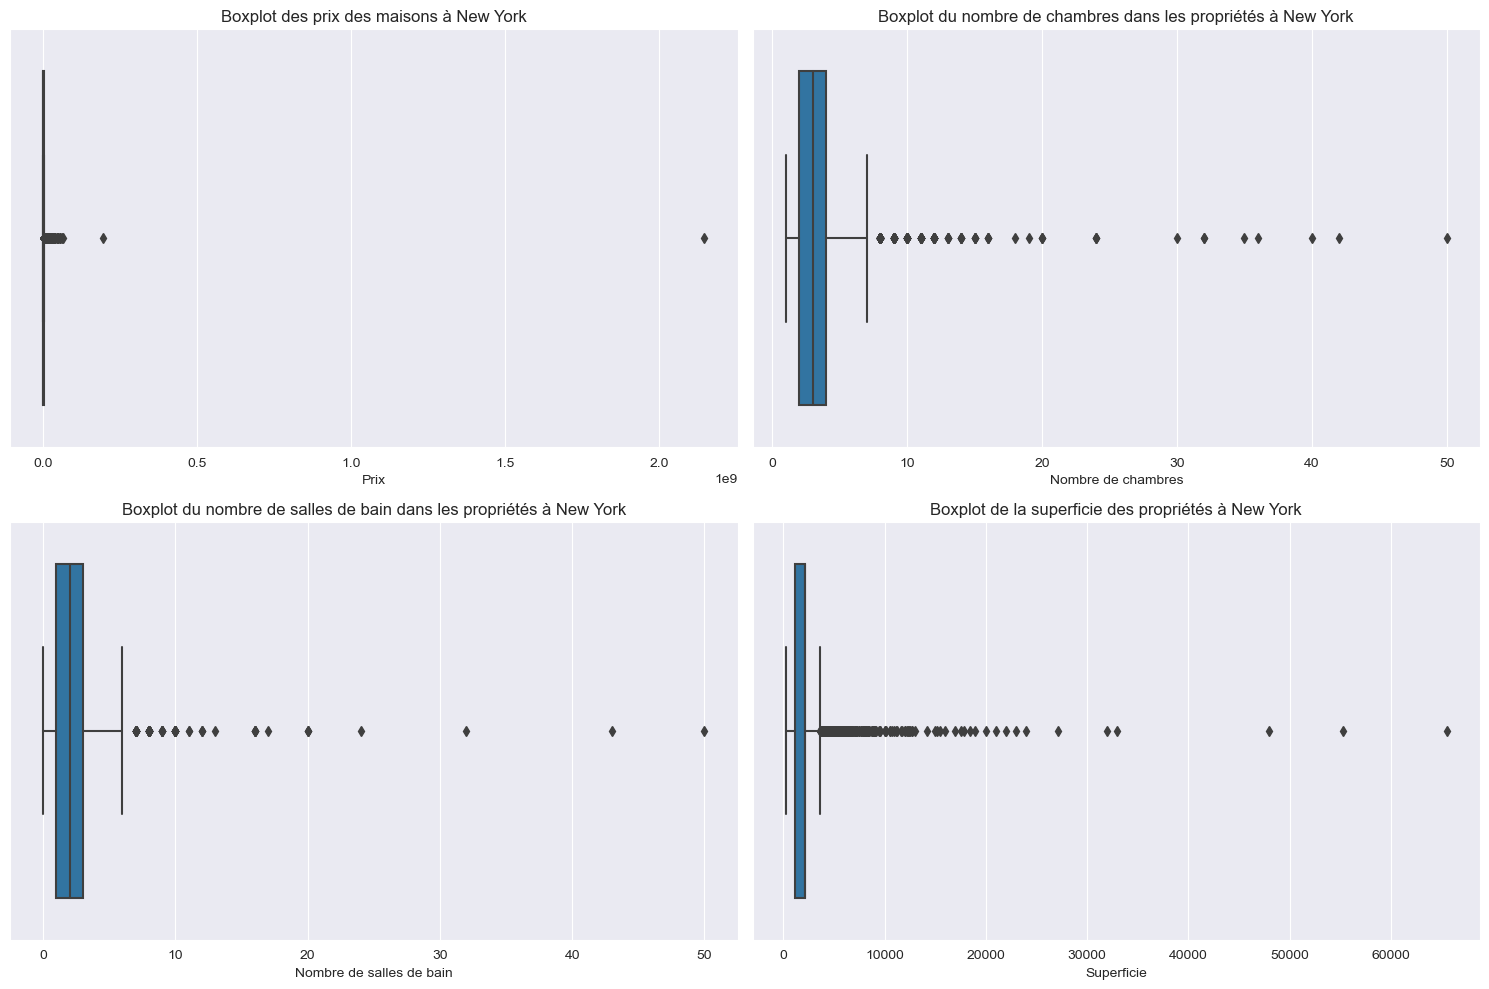

In [3295]:
# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot pour le prix des maisons (PRICE)
sn.boxplot(x=df['PRICE'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot des prix des maisons à New York')
axes[0, 0].set_xlabel('Prix')

# Boxplot pour le nombre de chambres (BEDS)
sn.boxplot(x=df['BEDS'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot du nombre de chambres dans les propriétés à New York')
axes[0, 1].set_xlabel('Nombre de chambres')

# Boxplot pour le nombre de salles de bain (BATH)
sn.boxplot(x=df['BATH'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot du nombre de salles de bain dans les propriétés à New York')
axes[1, 0].set_xlabel('Nombre de salles de bain')

# Boxplot pour les prix des maisons (PROPERTYSQFT)
sn.boxplot(x=df['PROPERTYSQFT'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de la superficie des propriétés à New York')
axes[1, 1].set_xlabel('Superficie')

# Affichage des graphiques
plt.tight_layout()
plt.show()

In [3296]:
# Liste des colonnes à nettoyer
colonnes = ['PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH']

# Boucle pour nettoyer les valeurs aberrantes de chaque colonne
for colonne in colonnes:
    # Calcul des quartiles Q1 (25e percentile) et Q3 (75e percentile)
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)

    # Calculer l'intervalle interquartile (IQR)
    IQR = Q3 - Q1

    # Calculer les limites inférieure et supérieure pour détecter les valeurs aberrantes
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    # Identifier les valeurs aberrantes
    outliers = df[(df[colonne] < borne_inf) | (df[colonne] > borne_sup)]

    # Supprimer les valeurs aberrantes identifiées avec la méthode des quartiles
    df = df.drop(outliers.index)

    # Afficher les informations sur les données mises à jour
    print("Nombre de lignes après suppression des valeurs aberrantes pour la colonne", colonne, ":", len(df))


Nombre de lignes après suppression des valeurs aberrantes pour la colonne PRICE : 4059
Nombre de lignes après suppression des valeurs aberrantes pour la colonne PROPERTYSQFT : 3931
Nombre de lignes après suppression des valeurs aberrantes pour la colonne BEDS : 3830
Nombre de lignes après suppression des valeurs aberrantes pour la colonne BATH : 3495


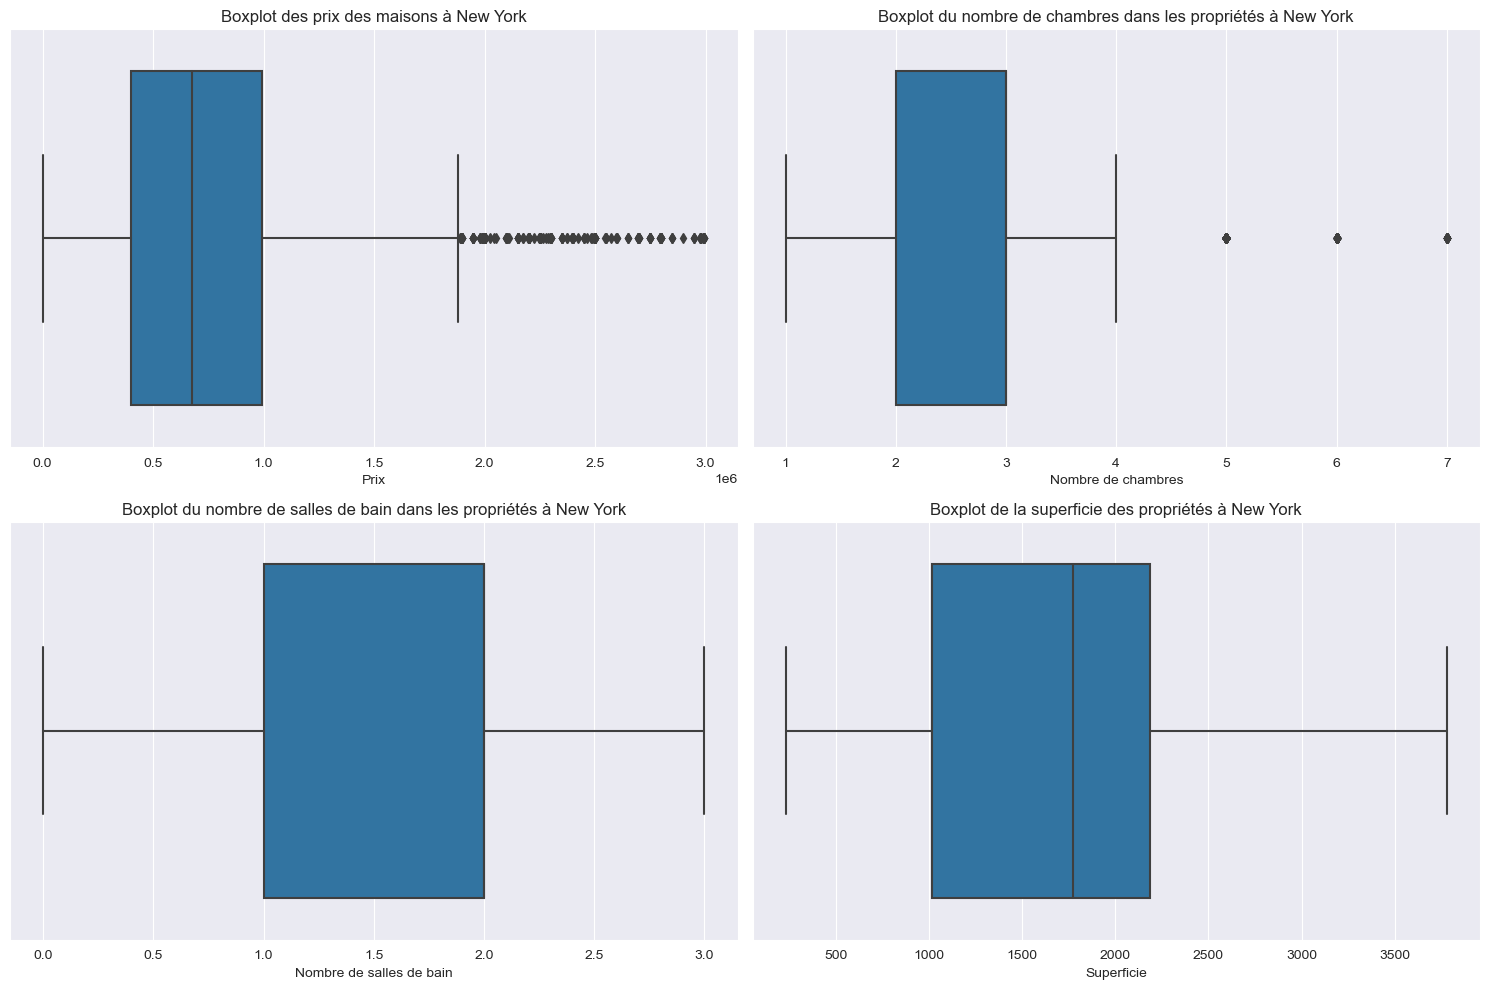

In [3297]:
# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot pour le prix des maisons (PRICE)
sn.boxplot(x=df['PRICE'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot des prix des maisons à New York')
axes[0, 0].set_xlabel('Prix')

# Boxplot pour le nombre de chambres (BEDS)
sn.boxplot(x=df['BEDS'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot du nombre de chambres dans les propriétés à New York')
axes[0, 1].set_xlabel('Nombre de chambres')

# Boxplot pour le nombre de salles de bain (BATH)
sn.boxplot(x=df['BATH'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot du nombre de salles de bain dans les propriétés à New York')
axes[1, 0].set_xlabel('Nombre de salles de bain')

# Boxplot pour les prix des maisons (PROPERTYSQFT)
sn.boxplot(x=df['PROPERTYSQFT'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de la superficie des propriétés à New York')
axes[1, 1].set_xlabel('Superficie')

# Affichage des graphiques
plt.tight_layout()
plt.show()

In [3298]:
print("nombre de valeur unique est: ", df['TYPE'].nunique())
print(df['TYPE'].value_counts(normalize=True))

nombre de valeur unique est:  13
Co-op for sale                0.365093
House for sale                0.214878
Condo for sale                0.195994
Multi-family home for sale    0.103290
Pending                       0.051216
Townhouse for sale            0.028040
Contingent                    0.020601
Land for sale                 0.012017
For sale                      0.003720
Foreclosure                   0.003147
Condop for sale               0.001144
Coming Soon                   0.000572
Mobile house for sale         0.000286
Name: TYPE, dtype: float64


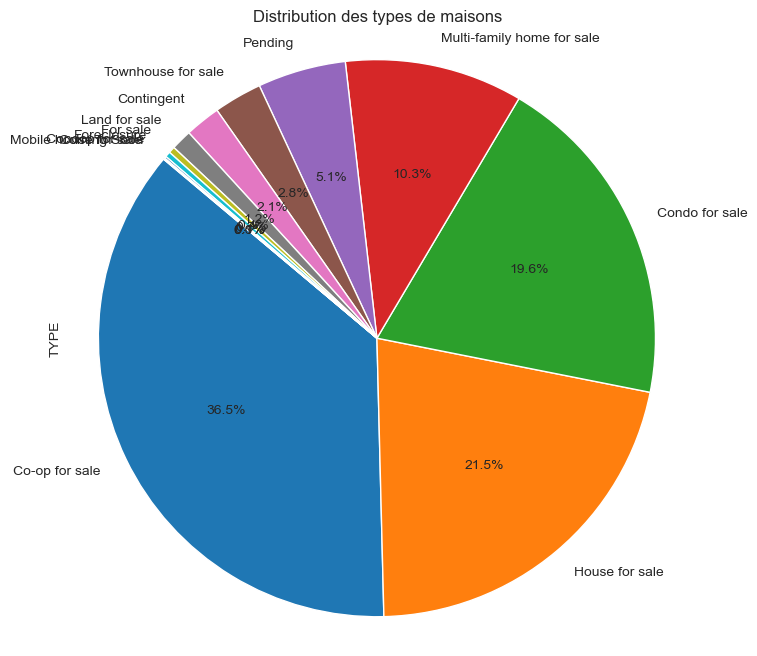

In [3299]:
# fréquences des différentes catégories
plt.figure(figsize=(8, 8))
df['TYPE'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution des types de maisons')
plt.show()

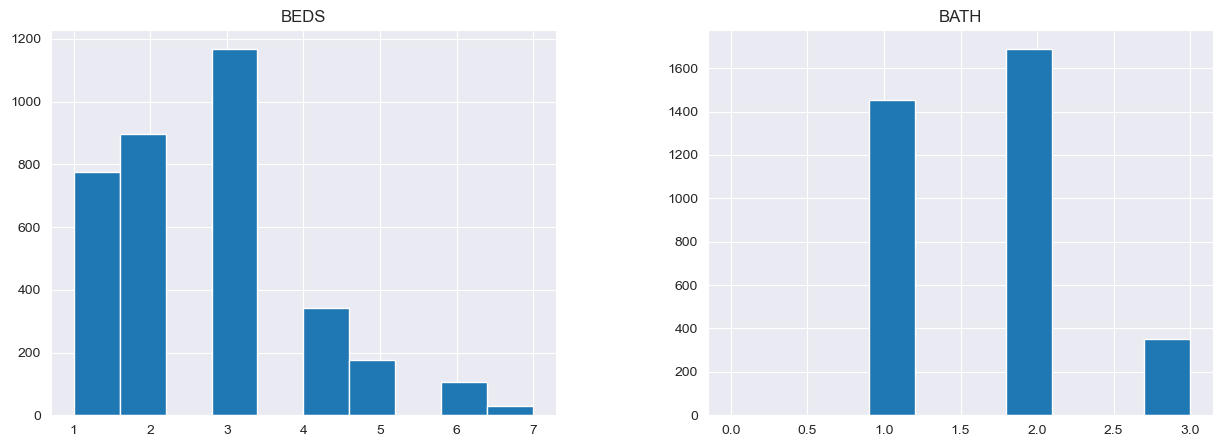

In [3300]:
df[['BEDS','BATH']].hist(figsize=(15, 5));

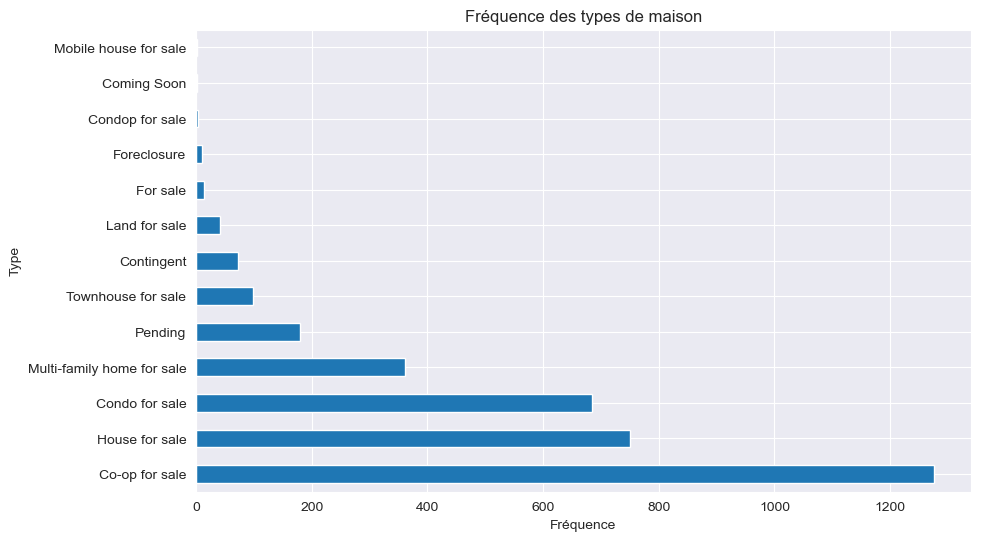

In [3301]:
plt.figure(figsize=(10, 6))
plt.title('Fréquence des types de maison')
plt.xlabel('Fréquence')
plt.ylabel('Type')
df["TYPE"].value_counts().plot.barh();

In [3302]:
print("Le nombre de valeur unique est: ", df['TYPE'].nunique())
print(df['TYPE'].value_counts(normalize=True))

Le nombre de valeur unique est:  13
Co-op for sale                0.365093
House for sale                0.214878
Condo for sale                0.195994
Multi-family home for sale    0.103290
Pending                       0.051216
Townhouse for sale            0.028040
Contingent                    0.020601
Land for sale                 0.012017
For sale                      0.003720
Foreclosure                   0.003147
Condop for sale               0.001144
Coming Soon                   0.000572
Mobile house for sale         0.000286
Name: TYPE, dtype: float64


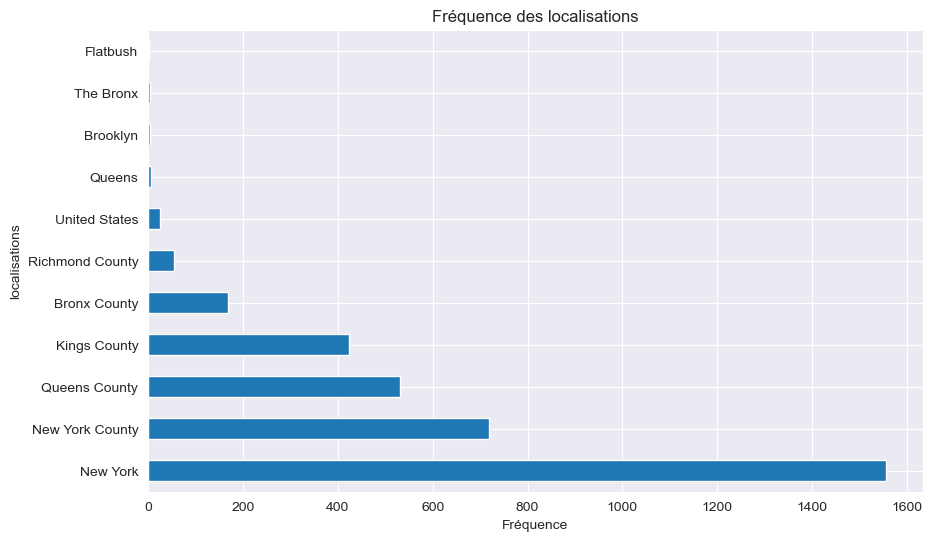

In [3303]:
plt.figure(figsize=(10, 6))
plt.title('Fréquence des localisations')
plt.xlabel('Fréquence')
plt.ylabel('localisations')
df["LOCALITY"].value_counts().plot.barh()
plt.xticks(rotation=0, ha='center')
plt.show()

In [3304]:
print("nombre de valeur unique est: ", df['LOCALITY'].nunique())
print(df['LOCALITY'].value_counts(normalize=True))

nombre de valeur unique est:  11
New York           0.445207
New York County    0.205722
Queens County      0.152217
Kings County       0.121030
Bronx County       0.048355
Richmond County    0.015451
United States      0.007439
Queens             0.001717
Brooklyn           0.001431
The Bronx          0.001144
Flatbush           0.000286
Name: LOCALITY, dtype: float64


In [3305]:
# encodage les variables 
enc = OrdinalEncoder()
df[['TYPE', 'LOCALITY','SUBLOCALITY','TYPE']] = enc.fit_transform(df[['TYPE', 'LOCALITY','SUBLOCALITY','TYPE']])


In [3306]:
#Analyse statistique descriptives avec les valeurs quantitatives
df[['BEDS','BATH','PRICE','PROPERTYSQFT']].describe()

,BEDS,BATH,PRICE,PROPERTYSQFT
count,3495.000000,3495.000000,3.495000e+03,3495.000000
mean,2.621745,1.685265,7.955423e+05,1637.578789
std,1.305392,0.646817,5.482842e+05,661.288233
min,1.000000,0.000000,2.494000e+03,230.000000
25%,2.000000,1.000000,3.990000e+05,1018.500000
50%,3.000000,2.000000,6.750000e+05,1773.000000
75%,3.000000,2.000000,9.925000e+05,2184.207862
max,7.000000,3.000000,2.995000e+06,3780.000000


In [3307]:
#Matrice de correlation
df_corr = df[['BEDS','BATH','PRICE','PROPERTYSQFT','LOCALITY','SUBLOCALITY','TYPE']]
matrix_corr=df_corr.corr()

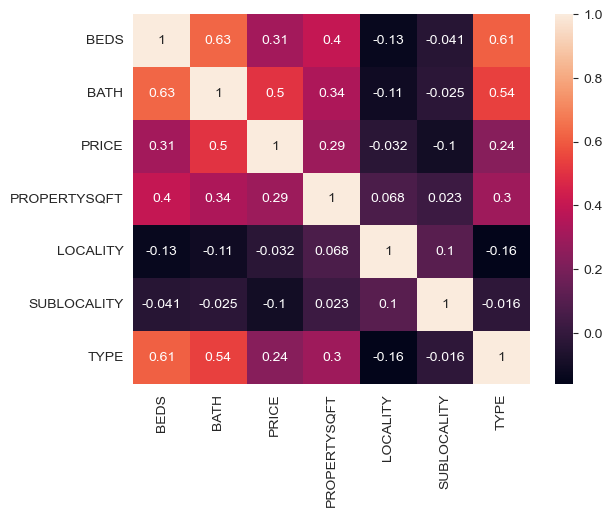

In [3308]:
#Visualisation la matrix de correlation
sn.heatmap(matrix_corr, annot=True)
plt.show()

# Preparation de la data

In [3309]:
data= df[['BEDS','BATH','PRICE','PROPERTYSQFT']]

# Division des données en ensembles d'entraînement et de test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

y_train = train_data['PRICE']
X_train = train_data.drop('PRICE', axis=1)  # Caractéristiques
y_test = test_data['PRICE']
X_test = test_data.drop('PRICE', axis=1)

# PCA TRAITEMENT  (Methode du cours)

In [3310]:

# 1-Standardisation
def data_normalisation(data):
    init_data = pd.DataFrame()
    for col in data.columns:
        # Calcul de la moyenne des colonnes
        col_mean = data[col].mean()
        # Calcul de la moyenne des de l'écart type
        col_std = data[col].std()
        # Calcul de la normalisation
        init_data[col] = (data[col] - col_mean) / col_std

    return init_data

standard_data = data_normalisation(train_data)
standard_data

,BEDS,BATH,PRICE,PROPERTYSQFT
2894,-0.465773,0.486487,0.841215,-0.879808
226,0.299387,0.486487,0.383174,0.166576
1327,0.299387,0.486487,-0.131644,0.822201
1570,-1.230933,-1.052221,-0.029045,0.822201
1329,-1.230933,-1.052221,-1.267563,-1.192364
...,...,...,...,...
1449,-0.465773,-1.052221,-0.725253,-1.470192
1498,1.064546,0.486487,0.930989,0.822201
1694,-1.230933,-1.052221,-1.011065,-1.266351
1132,0.299387,-1.052221,-0.303864,-1.491331


In [3311]:
def covariance_calcul(standard_data):
    init_data = pd.DataFrame()
    # Calcul de la covariance entre les valeurs mises à l'échelle
    for col in standard_data.columns:
        mean_value = standard_data[col].mean()
        init_data[col] = standard_data[col] - mean_value
    # Calcul de la covariance
    covariance_matrix = np.dot(init_data.T, init_data) / (len(init_data) - 1)

    return covariance_matrix

cov_calc = covariance_calcul(standard_data)

In [3312]:
# Calcul des valeurs propres et vecteurs propres de la matrice de covariance
eig_val, eig_vec = eig(cov_calc)

In [3313]:
# Projeté des données originales sur les composantes principales
transformed_data = np.dot(test_data.values, eig_vec[:, :2])
pca_result= pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2'])
pca_result


,PC1,PC2
0,-448125.838439,-304788.856011
1,-298578.529047,-203242.485236
2,-777885.356483,-530190.221200
3,-688428.460412,-468744.900473
4,-98932.786973,-67177.770621
...,...,...
694,-218796.685181,-148352.347078
695,-915958.412561,-623919.208145
696,-262323.729860,-178045.575898
697,-275315.334454,-187250.060857


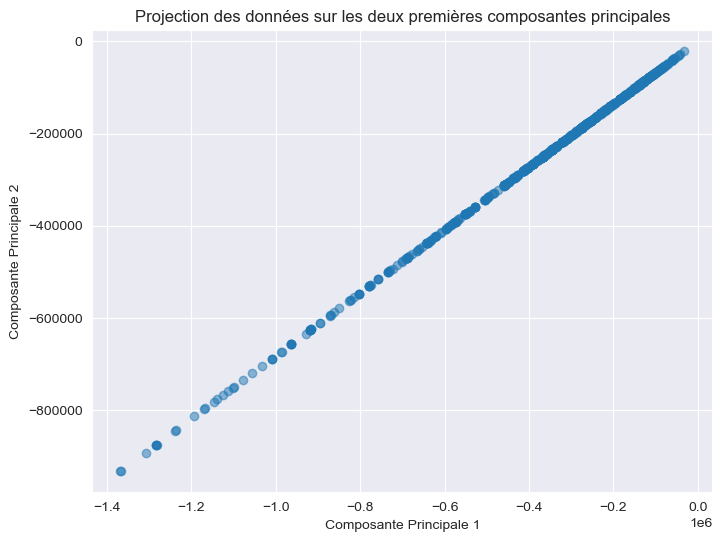

In [3314]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.grid(True)
plt.show()

# PCA Avec Sklearn 

In [3315]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3316]:
# Standardiser les données
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

In [3317]:
# Créer une instance PCA avec le nombre de composantes souhaitées
pca = PCA(n_components=2) 
# Appliquer PCA sur les données standardisées
principal_components_train = pca.fit(scaled_X_train)

#PCA sur l'ensemble de test si nécessaire
scaled_X_test = scaler.transform(X_test)
principal_components_test = pca.transform(scaled_X_test)
pca_result2= pd.DataFrame(data=principal_components_test, columns=['PC1', 'PC2'])
pca_result2


,PC1,PC2
0,-1.008404,1.488471
1,-0.888019,-0.420999
2,-0.892993,-0.604671
3,0.822957,0.319609
4,-0.654144,-1.242109
...,...,...
694,-1.008404,1.488471
695,0.406419,0.641469
696,1.360668,0.212957
697,0.746708,-0.877447


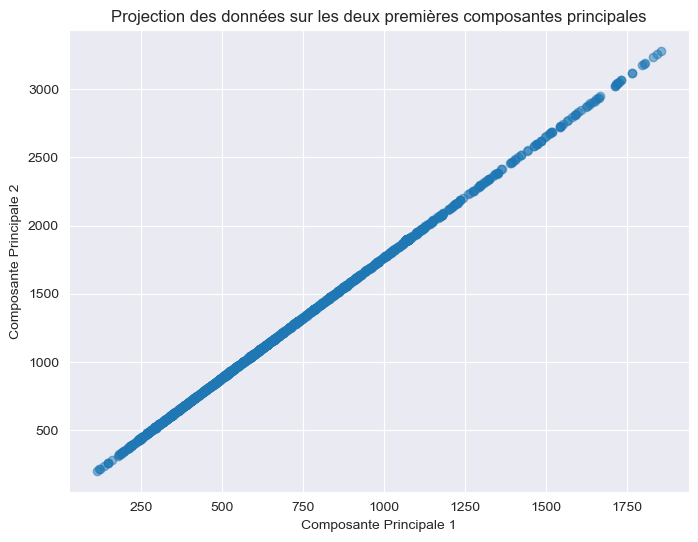

In [3318]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.grid(True)
plt.show()

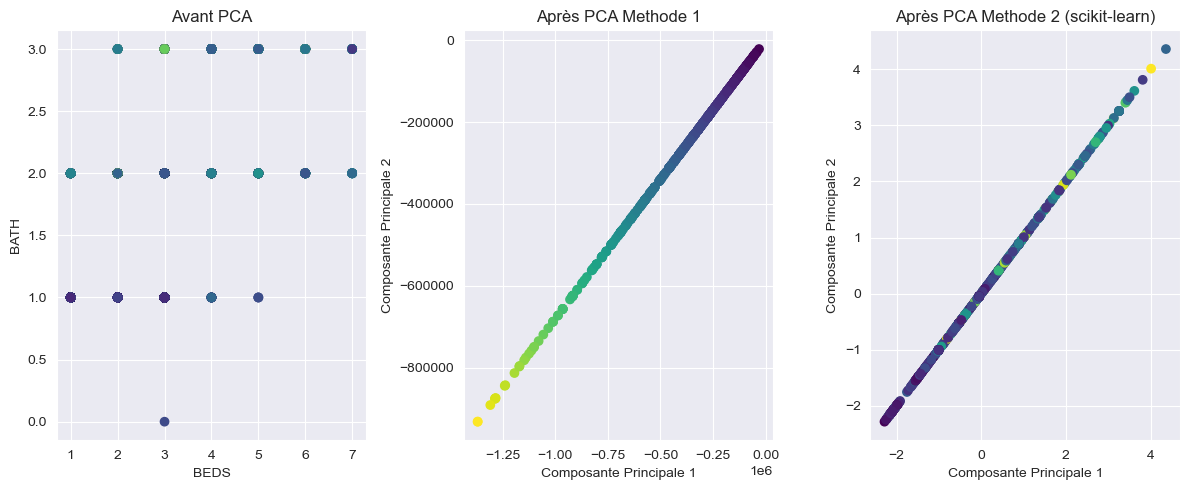

In [3319]:
# Visualisation avant PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.scatter(data['BEDS'], data['BATH'], c=data['PRICE'], cmap='viridis')
plt.xlabel('BEDS')
plt.ylabel('BATH')
plt.title('Avant PCA')

# Visualisation après PCA pour la méthode 1
plt.subplot(1, 3, 2)
plt.scatter(pca_result['PC1'], pca_result['PC2'], c=y_test, cmap='viridis')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Après PCA Methode 1')

# Visualisation après PCA pour la méthode 2
plt.subplot(1, 3, 3)
plt.scatter(pca_result2['PC1'],pca_result2['PC1'], c=y_test, cmap='viridis')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Après PCA Methode 2 (scikit-learn)')

plt.tight_layout()
plt.show()


# SelectKbest

In [3320]:
# Normalisation des caractéristiques avec MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Sélection des caractéristiques avec SelectKBest
selector = SelectKBest(score_func=chi2, k=2) 
selector.fit(X_train_normalized, y_train)
X_test_selected = selector.transform(X_test_normalized)

pca_result3= pd.DataFrame(data=X_test_selected, columns=['SelectedFeature1', 'SelectedFeature2'])
pca_result3

,SelectedFeature1,SelectedFeature2
0,0.000000,0.333333
1,0.333333,0.333333
2,0.000000,0.666667
3,0.333333,0.666667
4,0.166667,0.666667
...,...,...
694,0.000000,0.333333
695,0.166667,0.666667
696,0.500000,0.666667
697,0.500000,0.666667


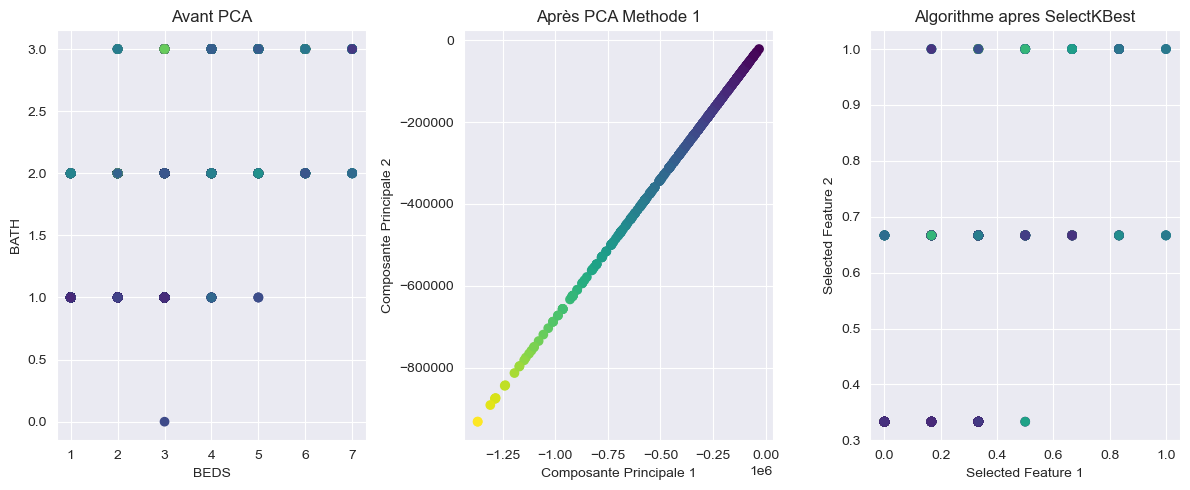

In [3321]:

# Visualisation avant PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.scatter(data['BEDS'], data['BATH'], c=data['PRICE'], cmap='viridis')
plt.xlabel('BEDS')
plt.ylabel('BATH')
plt.title('Avant PCA')

# Visualisation après PCA pour la méthode 1
plt.subplot(1, 3, 2)
plt.scatter(pca_result['PC1'], pca_result['PC2'], c=y_test, cmap='viridis')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Après PCA Methode 1')

# Visualisation après PCA pour la méthode 2
plt.subplot(1, 3, 3)
plt.scatter(pca_result3['SelectedFeature1'], pca_result3['SelectedFeature2'], c=y_test, cmap='viridis')
plt.xlabel('Selected Feature 1')
plt.ylabel('Selected Feature 2')
plt.title('Algorithme apres SelectKBest')

plt.tight_layout()
plt.show()
